### Problem 7

In [32]:
import numpy as np ; from scipy.optimize import fsolve, minimize, root
import pyEdgeworthBox as eb ; import matplotlib.pyplot as plt

#### Problem 1

<u> Part (a) </u> <br>
Implement the generalized equilibrium model used in class, but with Cobb-Douglasutility functions rather than quasilinear utility. (As was done in class, program the firstorder conditions for the consumers.) Use $$u(x_1,x_2)= 0.3 \times log(x_1) + 0.7 \times log(x_2) $$ Let consumer a be endowed with 2 units of each good and consumer 3 b be endowed with 1 unit of each good. Figure out the price and the quantities consumed.

In [19]:
I1a = 2 ; I2a = 2 ; I1b = 1 ; I2b = 1 

def constraints(arglist,endow1a,endow1b,endow2a,endow2b):
    x1a = arglist[0] ; x1b = arglist[1] ; p = arglist[2] ; cons = np.zeros(3)

    # Returns quantity consumed at period 2
    x2a = endow2a + p*(endow1a-x1a)
    x2b = endow2b + p*(endow1b-x1b)

    #Returns Equilibirum First Order Condition (u1a(x)-p*u2a(x) = 0)
    cons[0] = (0.3/x1a) -p *0.7/x2a # f.o.c. for consumer a
    cons[1] = (0.3/x1b) -p *0.7/x2b # f.o.c. for consumer b

    #Returns Market clearance condition (Ie Warlas'condition)
    cons[2] = x1a+x1b-endow1a-endow1b
    return cons

endow1a=2 ; endow1b=1 ; endow2a=2 ; endow2b=1 
res= root(constraints,np.ones(3),args=(endow1a,endow1b,endow2a,endow2b))
#print(res)
x=res['x']
print(f"x1a is given by {x[0]:.3f}")
print(f"x1b is given by {x[1]:.3f}")
print(f"the price is  {x[2]:.3f}")
print(f"x2a is given by {endow2a + x[2]*(endow1a-x[0]):.3f}")
print(f"x2b is given by {endow2b + x[2]*(endow1b-x[1]):.3f}")

print(f"So consumer a buys {x[0]-endow1a:.3f} units of good 1 at price {x[2]:.3f} and buys {x[2]*(endow1a-x[0]):.3f} units of good 2 at price 1.")


x1a is given by 2.000
x1b is given by 1.000
the price is  0.429
x2a is given by 2.000
x2b is given by 1.000
So consumer a buys 0.000 units of good 1 at price 0.429 and buys -0.000 units of good 2 at price 1.


Validate Walras’ law: That is, show that the market for good number 2 also clears inequilibrium, even though this market clearing condition (demand=supply) is not partof the equation system used in the solution .

In [22]:
print(x[1] + endow2b + x[2]*(endow1b-x[1]) -endow1b -endow2b)


I1a = 2 ; I2a = 2 ; I1b = 1 ; I2b = 1 

def constraints(arglist,endow1a,endow1b,endow2a,endow2b):
    x2a = arglist[0] ; x2b = arglist[1] ; p = arglist[2] ; cons = np.zeros(3)

    # Returns quantity consumed at period 2
    x1a = endow2a + p*(endow1a-x2a)
    x1b = endow2b + p*(endow1b-x2b)

    #Returns Equilibirum First Order Condition (u1a(x)-p*u2a(x) = 0)
    cons[0] = (0.3/x2a) -p *0.7/x1a # f.o.c. for consumer a
    cons[1] = (0.3/x2b) -p *0.7/x1b # f.o.c. for consumer b

    #Returns Market clearance condition (Ie Warlas'condition)
    cons[2] = x2a+x2b-endow2a-endow2b
    return cons

endow1a=2 ; endow1b=1 ; endow2a=2 ; endow2b=1 
res= root(constraints,np.ones(3),args=(endow1a,endow1b,endow2a,endow2b))
#print(res)
x=res['x']
print(f"x1a is given by {x[0]:.3f}")
print(f"x1b is given by {x[1]:.3f}")
print(f"the price is  {x[2]:.3f}")
print(f"x2a is given by {endow2a + x[2]*(endow1a-x[0]):.3f}")
print(f"x2b is given by {endow2b + x[2]*(endow1b-x[1]):.3f}")

print(f"So consumer a buys {x[0]-endow1a:.3f} units of good 1 at price {x[2]:.3f} and buys {x[2]*(endow1a-x[0]):.3f} units of good 2 at price 1.")


-4.762856775641922e-13
x1a is given by 2.000
x1b is given by 1.000
the price is  0.429
x2a is given by 2.000
x2b is given by 1.000
So consumer a buys 0.000 units of good 1 at price 0.429 and buys -0.000 units of good 2 at price 1.


Draw a random point in the Edgeworth box for this problem, that is, an allocation ofthe goods to the two consumers. Show that the indifference curves of the consumerscross in this point. (The slopes of the indifference curves are (- du/dx1) / (du/dx2) ).By drawing 1000 random points from the Edgeworth box, find some points in theEdgeworth box that give Pareto improvements to the initial random point.

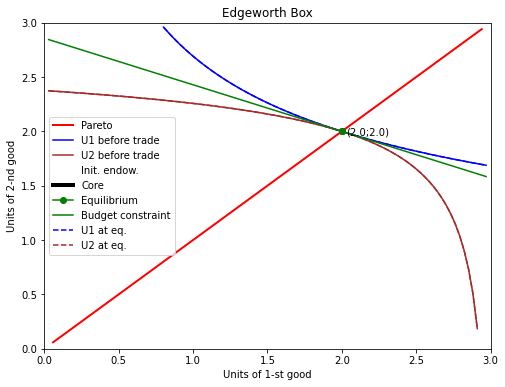

In [33]:
EB=eb.EdgeBox(  u1 = lambda x,y: 0.3 * np.log(x) + 0.7*np.log(y)
              , u2 = lambda x,y: 0.3 * np.log(x) + 0.7*np.log(y)
              , IE1 = [2,2]
              , IE2 = [1,1])

plt.figure(figsize = (8, 6))
EB.plot()

The pareto optmimum is found where the two indifference curves are tangent and where this tangent is also meeting the budget line. It means that at this precise point the utility for both consumers is maximized and is feasible.

[Source Package](https://github.com/maxlit/pyEdgeworthBox/blob/master/README.ipynb)

### Exercice 2